In [4]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
#importar dados , coloquei o r antes do caminho do arquivo para reconhecer como string
dataset = pd.read_csv(r'C:\Users\thiag\Desktop\Programação\Data Science\Curso DS\MaterialAula\00Feito\10.Prática em Python\dados\Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#tamanho
dataset.shape

(999, 12)

In [7]:
#primeiro problema é dar nomes legíveis e cientes para as colunas.
dataset.columns = ['ID', 'Score', 'Estado', 'Gênero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCrédito', 'Ativo', 'Salário', 'Saiu']
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


ANÁLISE EXPLORATÓRIA

In [8]:
#explorar dados categóricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot: xlabel='Estado'>

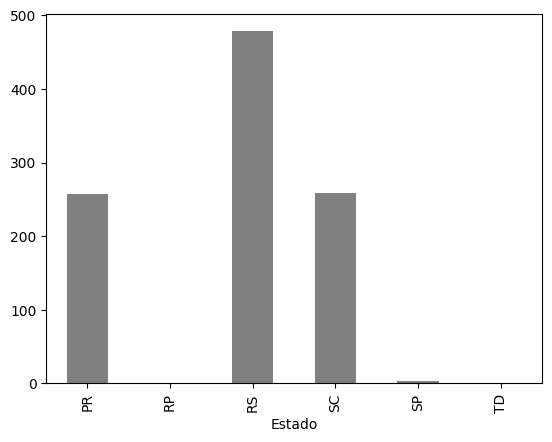

In [9]:
agrupado.plot.bar(color = 'gray')

In [10]:
#gênero
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot: xlabel='Gênero'>

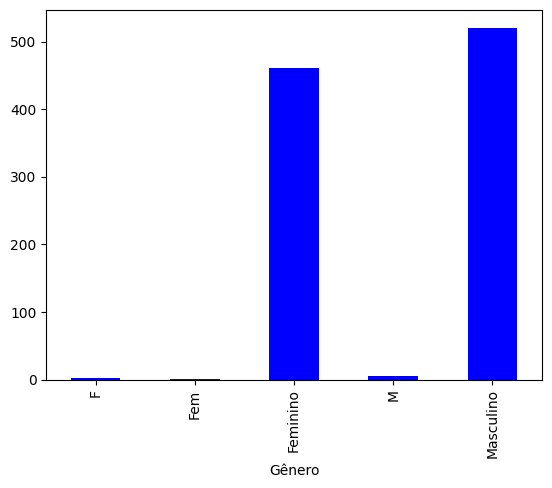

In [11]:
agrupado.plot.bar(color = 'blue')

In [12]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

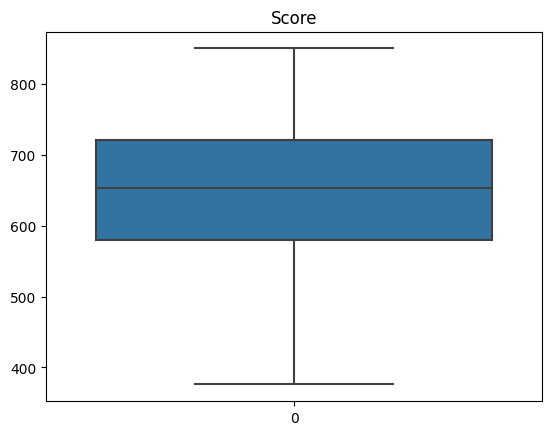

In [13]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

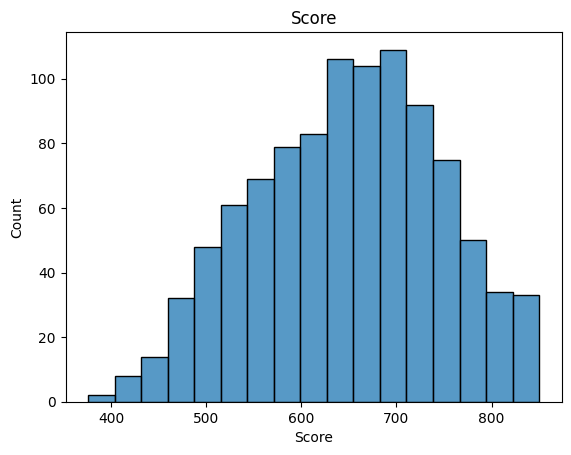

In [14]:
# passado pelo professor foi: srn.distplot porém esta função sairá de produção, como opção tem a displot ou a histplot.
srn.histplot(dataset['Score']).set_title('Score')

In [15]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

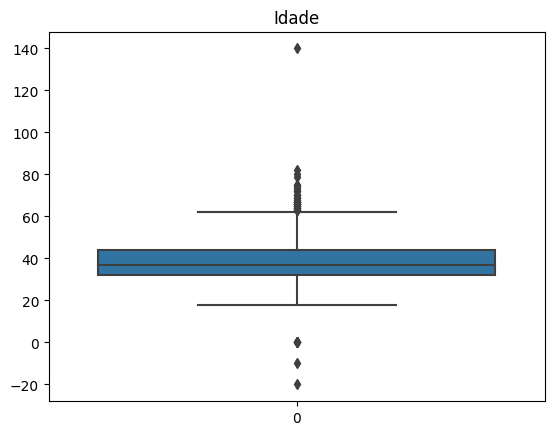

In [16]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

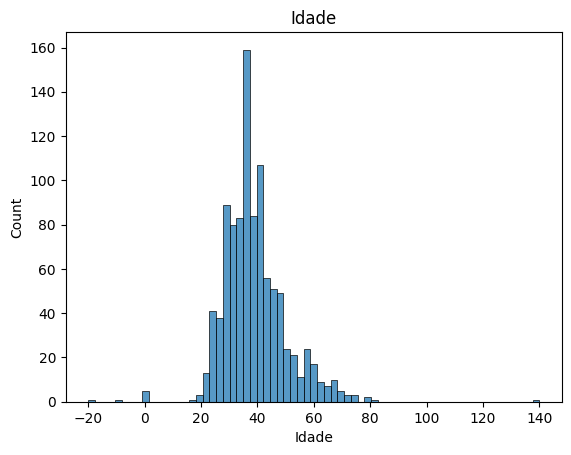

In [17]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [18]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

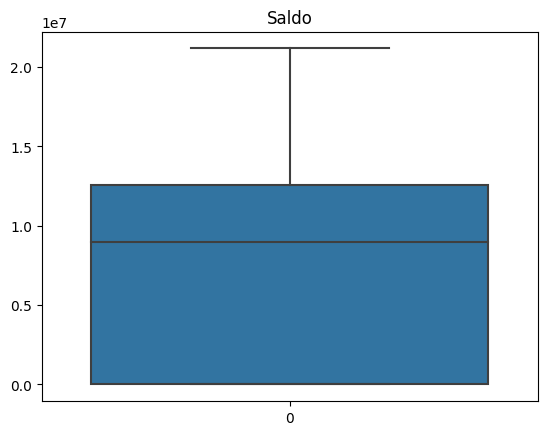

In [19]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

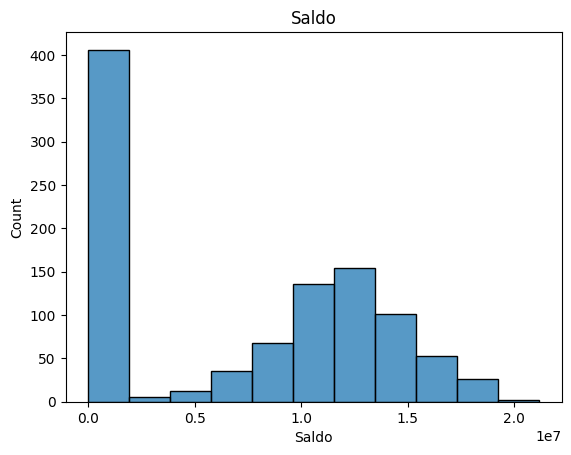

In [20]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [21]:
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

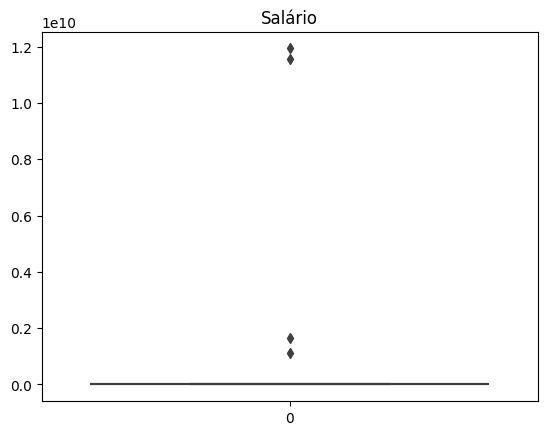

In [22]:
srn.boxplot(dataset['Salário']).set_title('Salário')

Text(0.5, 1.0, 'Salário')

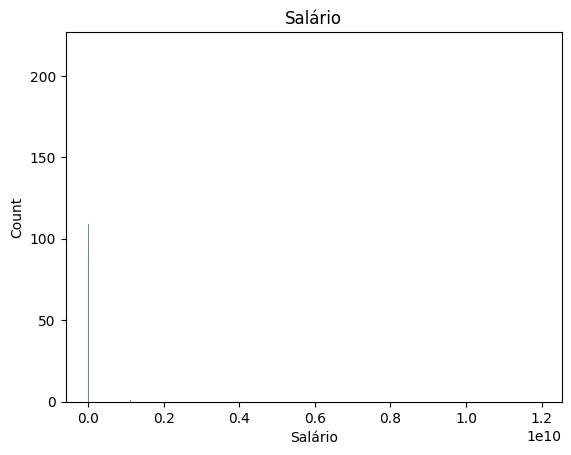

In [23]:
srn.histplot(dataset['Salário']).set_title('Salário')

In [24]:
#contamos valores NAs (não preenchidos)
#genero e salario
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

TRATAMENTO DE DADOS

In [25]:
#Salários
#remover NAs e substituir pela mediana
dataset['Salário'].describe()   

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [26]:
mediana = sts.median(dataset['Salário'])
mediana

70518.0

In [27]:
#substituir NAs por mediana
dataset['Salário'].fillna(mediana, inplace=True) #lembrando que o inplace significa que o valor ficará assim.

In [28]:
#verificamos se os NAs não existem mais
dataset['Salário'].isnull().sum()

0

In [29]:
#genero, falta padronizar e NAs
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [30]:
#total de NAs
dataset['Gênero'].isnull().sum()

8

In [31]:
#preenche NAs com Masculino (moda)
dataset['Gênero'].fillna('Masculino', inplace=True)

In [32]:
#verificamos novamente NANs
dataset['Gênero'].isnull().sum()

0

In [33]:
#padroniza de acordo com o domínio
dataset.loc[dataset['Gênero'] ==  'M', 'Gênero'] = "Masculino"
dataset.loc[dataset['Gênero'].isin( ['Fem','F']), 'Gênero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
Feminino     464
Masculino    535
dtype: int64

In [34]:
#idades fora do domínio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [35]:
#visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ] #a | significa e/ou para uma condição

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [36]:
#calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [37]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [38]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [39]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [40]:
#excluímos pelo ID
dataset.drop_duplicates(subset="ID", keep='first', inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [41]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [50]:
#atribuímos RS (moda) #moda é o maior caso de ocorrência
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [43]:
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [44]:
#outliers em salário, vamos considerar 2* desvios padrão, este é o padrão
desv = sts.stdev(dataset['Salário'])
desv

528988918.4679201

In [45]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salário'] >=  2 * desv ] 

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [46]:
#vamos atualizar salários para mediana, calculamos
mediana = sts.median(dataset['Salário'])
mediana

8637195.5

In [47]:
#atribumos
dataset.loc[dataset['Salário'] >=  2 * desv, 'Salário'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salário'] >=  2 * desv ] 

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [48]:
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [49]:
dataset.shape

(998, 12)